In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [34]:
(trainX,trainY),(testX,testY)=tf.keras.datasets.fashion_mnist.load_data() # ---- 의류 구분하는 라이브러리 제공 연습데이터

In [35]:
trainX.shape # ---- 28행 28열 60000개

(60000, 28, 28)

In [36]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

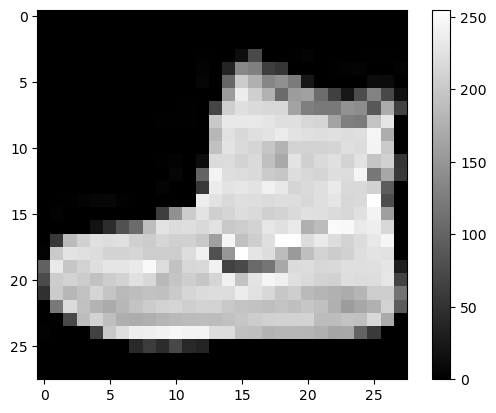

In [39]:
plt.imshow(trainX[0])
plt.colorbar()

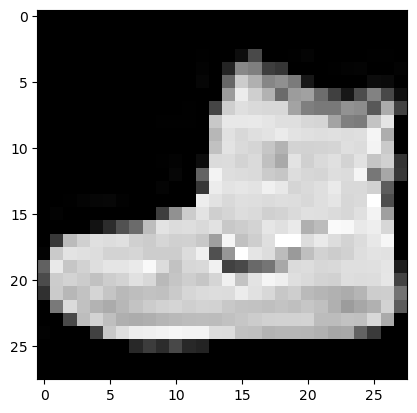

In [38]:
plt.gray()
plt.imshow(trainX[0])

In [41]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankleboot']

In [42]:
trainX=trainX/255.0
testX=testX/255.0
trainX=trainX.reshape((trainX.shape[0],28,28,1))
testX=testX.reshape((testX.shape[0],28,28,1))

In [43]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [44]:
trainY.shape

(60000,)

In [45]:
tf.keras

<module 'keras.api._v2.keras' from "C:\\Users\\BIT'\\AppData\\Roaming\\Python\\Python39\\site-packages\\keras\\api\\_v2\\keras\\__init__.py">

In [46]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation = 'relu', input_shape = (28, 28, 1)), # ---- convolution. 이미지 위치 바뀌어도 인식할 수 있게
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')   
    
])

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dense_4 (Dense)             (None, 14, 14, 64)        2112      
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                125450    
                                                                 
Total params: 127,882
Trainable params: 127,882
Non-trainable params: 0
________________________________________________

In [48]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [49]:
model.fit(trainX, trainY, validation_data = (testX, testY), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4089 - accuracy: 0.8548 - val_loss: 0.3360 - val_accuracy: 0.8820
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2881 - accuracy: 0.8981 - val_loss: 0.2908 - val_accuracy: 0.8978
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2470 - accuracy: 0.9123 - val_loss: 0.2919 - val_accuracy: 0.8973
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2196 - accuracy: 0.9211 - val_loss: 0.2638 - val_accuracy: 0.9052
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1963 - accuracy: 0.9279 - val_loss: 0.2567 - val_accuracy: 0.9086


In [54]:
score = model.evaluate(testX, testY)
print(score)

313/313 [==============================] - 1s 4ms/step - loss: 0.2567 - accuracy: 0.9086
[0.25671902298927307, 0.9085999727249146]
